In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization,CuDNNLSTM
import re    #for regex
import seaborn as sns
import matplotlib.pyplot as plt
import string
from tensorflow import keras
import re    #for regex
import nltk

nltk.download('stopwords')
from wordcloud import WordCloud
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
train = pd.read_csv('G:/toxic_5.csv',usecols =["comment_text","Toxic"])

In [6]:
train.dtypes

comment_text    object
Toxic            int64
dtype: object

In [7]:
train

,comment_text,Toxic
0,Discussion requires both parties to explain th...,0
1,"Avoiding Edit Wars \n\nAcroterion, I have been...",0
2,omg I've never thought of it that way. pure ge...,0
3,"Because of our recent edits to SkyCable, the u...",0
4,No harm done i deleted the second comment,0
...,...,...
41034,new mutants putlocker” about to be the #1 goog...,1
41035,It was better than the New Mutants. There were...,1
41036,Whenever I THINK that I’m TRULY Fast & Furious...,1
41037,My man wasn't to happy I left on this Harley D...,1


In [8]:
train.dropna(axis=0,how="any")

,comment_text,Toxic
0,Discussion requires both parties to explain th...,0
1,"Avoiding Edit Wars \n\nAcroterion, I have been...",0
2,omg I've never thought of it that way. pure ge...,0
3,"Because of our recent edits to SkyCable, the u...",0
4,No harm done i deleted the second comment,0
...,...,...
41034,new mutants putlocker” about to be the #1 goog...,1
41035,It was better than the New Mutants. There were...,1
41036,Whenever I THINK that I’m TRULY Fast & Furious...,1
41037,My man wasn't to happy I left on this Harley D...,1


In [9]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) 

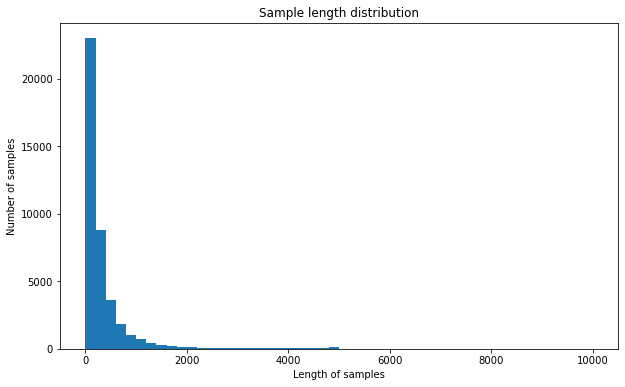

In [10]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(train['comment_text'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [11]:
num_duplicates = train.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 0 duplicate reviews present in the dataset


In [12]:
train.drop_duplicates(inplace = True)

In [13]:
train.shape

(41039, 2)

In [14]:
train

,comment_text,Toxic
0,Discussion requires both parties to explain th...,0
1,"Avoiding Edit Wars \n\nAcroterion, I have been...",0
2,omg I've never thought of it that way. pure ge...,0
3,"Because of our recent edits to SkyCable, the u...",0
4,No harm done i deleted the second comment,0
...,...,...
41034,new mutants putlocker” about to be the #1 goog...,1
41035,It was better than the New Mutants. There were...,1
41036,Whenever I THINK that I’m TRULY Fast & Furious...,1
41037,My man wasn't to happy I left on this Harley D...,1


In [15]:
train=train.reset_index(drop=True)

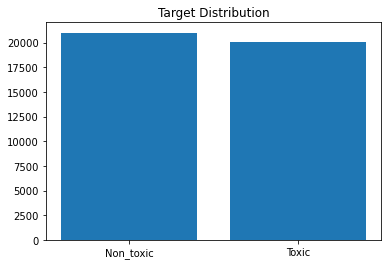

In [16]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [17]:
sum(train["Toxic"]==0)

21000

In [18]:
sum(train["Toxic"]==1)

20039

In [19]:
clean= {
"ain't": "are not",
"'s":" is",
"aren't": "are not",
 "can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have","couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
"don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would",
"he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
"how'd": "how did","how'd'y": "how do you","how'll": "how will",
"I'd": "I would", "I'd've": "I would have","I'll": "I will",
"I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
"it'd": "it would","it'd've": "it would have","it'll": "it will",
"it'll've": "it will have", "let's": "let us","ma'am": "madam",
"mayn't": "may not","might've": "might have","mightn't": "might not", 
"mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not",
"needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
"shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
"she'll": "she will", "she'll've": "she will have","should've": "should have",
"shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
"that'd": "that would","that'd've": "that would have", "there'd": "there would",
"there'd've": "there would have", "they'd": "they would",
"they'd've": "they would have","they'll": "they will",
"they'll've": "they will have", "they're": "they are","they've": "they have",
"to've": "to have","wasn't": "was not","we'd": "we would",
"we'd've": "we would have","we'll": "we will","we'll've": "we will have",
"we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
"what'll've": "what will have","what're": "what are", "what've": "what have",
"when've": "when have","where'd": "where did", "where've": "where have",
"who'll": "who will","who'll've": "who will have","who've": "who have",
"why've": "why have","will've": "will have","won't": "will not",
"won't've": "will not have", "would've": "would have","wouldn't": "would not",
"wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have", "you're": "you are",
"you've": "you have"
}

In [20]:
def clean_text(text):
    
    text = text.lower()
    text=  re.sub(r"https?://\S+|www\.\S+", "", text)  #Remove URLs from a sample string
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'[^\x00-\x7f]',r'', text) #Remove non-ASCII characters 
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [21]:
train['comment_text_clean'] = train['comment_text'].apply(lambda x: clean_text(x))

In [22]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [24]:
max_feature = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [25]:
sequences = tokenizer.texts_to_sequences(train_x)

In [26]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [27]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [28]:
word_index = tokenizer.word_index

In [29]:
word_index 

{'the': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'and': 5,
 'i': 6,
 'of': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'your': 13,
 'are': 14,
 'this': 15,
 'not': 16,
 'on': 17,
 'fuck': 18,
 'be': 19,
 'have': 20,
 '"': 21,
 'as': 22,
 'my': 23,
 'with': 24,
 'if': 25,
 'was': 26,
 'an': 27,
 'or': 28,
 'but': 29,
 'do': 30,
 'me': 31,
 'what': 32,
 'from': 33,
 'by': 34,
 'about': 35,
 'so': 36,
 'like': 37,
 'can': 38,
 'will': 39,
 'at': 40,
 'all': 41,
 'article': 42,
 'just': 43,
 'he': 44,
 'do not': 45,
 'no': 46,
 'wikipedia': 47,
 'they': 48,
 'has': 49,
 'who': 50,
 'go': 51,
 'page': 52,
 'am': 53,
 'would': 54,
 'one': 55,
 'there': 56,
 'please': 57,
 'been': 58,
 'should': 59,
 'some': 60,
 '-': 61,
 'get': 62,
 'because': 63,
 'know': 64,
 'any': 65,
 'we': 66,
 'talk': 67,
 'his': 68,
 'other': 69,
 'fucking': 70,
 'more': 71,
 'which': 72,
 'how': 73,
 'nigger': 74,
 'why': 75,
 "i'm": 76,
 'think': 77,
 "it's": 78,
 'faggot': 79,
 'up': 80,
 'suck': 81,
 'p

In [30]:
embeddings_index = {}
with open("G:/glove.6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:#100dim
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()



In [31]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [34]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
lstm_model=Sequential()
lstm_model.add(Embedding(len(word_index)+1, #Vocablury number
                                    100, #Embedding dim
                                    weights=[embedding_matrix], #Embeddings matrix pre-trained model
                                    trainable=False, #False.
                                  input_length=500))#maxlens
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          12773100  
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,815,405
Trainable params: 42,305
Non-trainable params: 12,773,100
_________________________________________________________________
None


In [35]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=10, verbose=2, mode='auto', restore_best_weights=True)
history = lstm_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=20, validation_split= 0.1,shuffle=True,callbacks=[callback])

Epoch 1/20
231/231 [==============================] - 32s 48ms/step - loss: 0.3897 - accuracy: 0.8255 - val_loss: 0.3094 - val_accuracy: 0.8718
Epoch 2/20
231/231 [==============================] - 10s 45ms/step - loss: 0.3333 - accuracy: 0.8573 - val_loss: 0.2903 - val_accuracy: 0.8812
Epoch 3/20
231/231 [==============================] - 11s 46ms/step - loss: 0.3037 - accuracy: 0.8684 - val_loss: 0.2783 - val_accuracy: 0.8822
Epoch 4/20
231/231 [==============================] - 11s 46ms/step - loss: 0.2879 - accuracy: 0.8767 - val_loss: 0.2685 - val_accuracy: 0.8852
Epoch 5/20
231/231 [==============================] - 11s 46ms/step - loss: 0.2812 - accuracy: 0.8808 - val_loss: 0.2674 - val_accuracy: 0.8876
Epoch 6/20
231/231 [==============================] - 11s 46ms/step - loss: 0.2729 - accuracy: 0.8844 - val_loss: 0.2655 - val_accuracy: 0.8849
Epoch 7/20
231/231 [==============================] - 11s 46ms/step - loss: 0.2655 - accuracy: 0.8871 - val_loss: 0.2616 - val_accuracy:

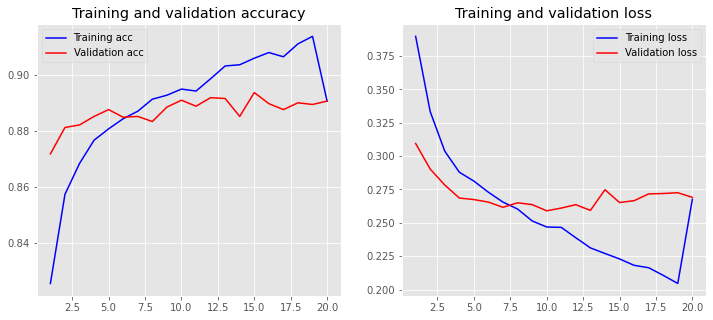

In [38]:
plot_history(history)

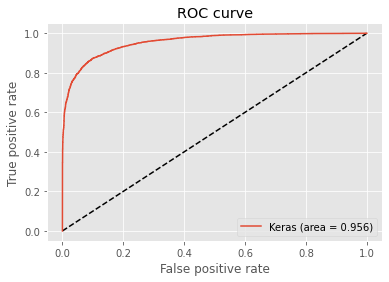

In [45]:
from sklearn.metrics import roc_curve
y_pred=lstm_model.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [51]:
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.54005766
              precision    recall  f1-score   support

           0     0.8815    0.9027    0.8919      4234
           1     0.8936    0.8707    0.8820      3974

    accuracy                         0.8872      8208
   macro avg     0.8875    0.8867    0.8870      8208
weighted avg     0.8873    0.8872    0.8871      8208



In [37]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(len(word_index)+1, #Vocablury number
                                    100, #Embedding dim
                                    weights=[embedding_matrix], #Embeddings matrix pre-trained model
                                    trainable=False, #False.
                                  input_length=500))#maxlens
bi_model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.3)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(128))) #lstm with 100 neurons
bi_model.add(Dropout(0.3))
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          12773100  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 500, 256)          234496    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 256)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 13,402,093
Trainable params: 628,993
Non-trainable params: 12,773,100
____________________________________

In [38]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.002, patience=10, verbose=2, mode='auto', restore_best_weights=True)
history = bi_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=20,  validation_split= 0.1,shuffle=True,callbacks=[callback])

Epoch 1/20
231/231 [==============================] - 90s 364ms/step - loss: 0.4320 - accuracy: 0.8063 - val_loss: 0.3263 - val_accuracy: 0.8648
Epoch 2/20
231/231 [==============================] - 83s 359ms/step - loss: 0.3342 - accuracy: 0.8556 - val_loss: 0.2925 - val_accuracy: 0.8770
Epoch 3/20
231/231 [==============================] - 83s 359ms/step - loss: 0.3172 - accuracy: 0.8669 - val_loss: 0.2833 - val_accuracy: 0.8779
Epoch 4/20
231/231 [==============================] - 83s 359ms/step - loss: 0.2880 - accuracy: 0.8801 - val_loss: 0.2684 - val_accuracy: 0.8858
Epoch 5/20
231/231 [==============================] - 83s 358ms/step - loss: 0.2882 - accuracy: 0.8783 - val_loss: 0.3388 - val_accuracy: 0.8614
Epoch 6/20
231/231 [==============================] - 83s 359ms/step - loss: 0.2754 - accuracy: 0.8849 - val_loss: 0.2667 - val_accuracy: 0.8886
Epoch 7/20
231/231 [==============================] - 83s 359ms/step - loss: 0.2659 - accuracy: 0.8893 - val_loss: 0.2646 - val_ac

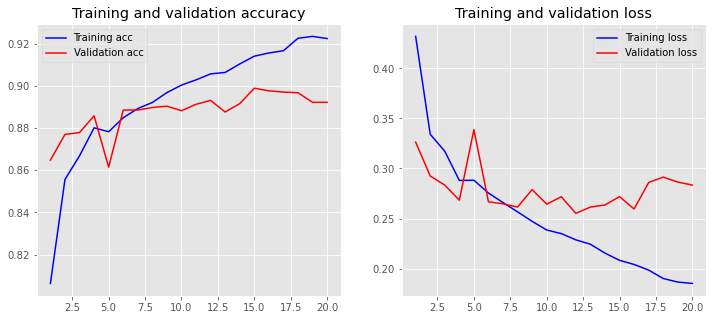

In [45]:
plot_history(history)

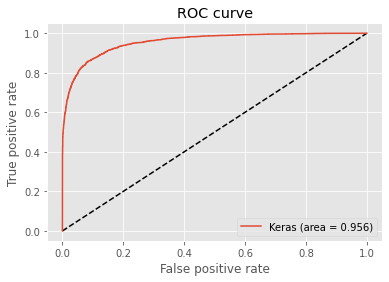

In [42]:
from sklearn.metrics import roc_curve
y_pred=bi_model.predict(x_testing).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [44]:
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import classification_report
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.6237229
              precision    recall  f1-score   support

           0     0.8732    0.9159    0.8941      4234
           1     0.9055    0.8583    0.8813      3974

    accuracy                         0.8880      8208
   macro avg     0.8894    0.8871    0.8877      8208
weighted avg     0.8888    0.8880    0.8879      8208



In [180]:
bi_model.save('week7_1model')

INFO:tensorflow:Assets written to: week6_1model\assets


INFO:tensorflow:Assets written to: week6_1model\assets


In [259]:
from tensorflow.keras.models import load_model 
new_model = tf.keras.models.load_model('week6_1model')

In [62]:
sample_text=["This movie is kind of a mixed bag. There are certain elements of it that I think are creative, but by far it is definitely one of the lesser Marvel films. The only thing I disagree with Martin Scorsese about is that Marvel movies are like theme park rides because there are ones like Endgame, Thor Ragnarok (my personal favourite Marvel movie), Civil War, The Avengers, Infinity War and many others that have a far deeper meaning and much more than just entertainment. Overall, Venom is one of those okay movies that doesn't deserve hate, the scenes where the Venom inside Tom Hardy's character is talking to him are pretty hilarious"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [58]:
sample_text=["Only saw this once or twice - I don't remember - many years ago; haven't been interested in seeing it again since there was a time when I was younger and I slightly enjoyed dumb movies but this went to deep into stupidity. That's about it - nothing good about it just a drag!"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [56]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [62]:
sample_text=["There seems to be quite a bit of agreement on what Im about to say about the film. Venom doesnt quite know what it is. It cant decide wether its a goofy, action or a horror movie. Therefore its all of it and none at the same time. The goofy jokes are pretty lame, which is why they are funny, you dont laugh with the writers, you laugh at them. The action scenes are meh at best, car chase : check motorcycle : check ridiculous (bad) cgi fight: check sure, watching Tom Hardy motorcross in San Francisco is quite fun, but its not really action. Finally, the horror; there are glimpses, glimmers of hope scattered around this movie. Little snippets of what could have been, but as soon as they appear they disappear. Two scenes really stood out to me due to their potential. After quite a lot of buildup of Venom getting into the building (BY RUNNING UP IT), Eddie decides to take the lift down. Instead of having Eddie walk into the SWAT team, they should have been swarming the building crawling through the floors looking for him. Then, they could have had an ALIEN like hunting scene where Venom slowly takes out the task force one by one, in true horror movie fashion. The other obvious horror scene could have been using the creepy little girl that delivers RIOT to the Musk wannabe, they could have homaged The Shining, they could have pulled an exorcist, they could have done a million things, but the little girl just has white pupils and a deep voice. Throughout the movie there are just continuous disappointments because you see what it is missing. Instead of the cheap love story and all the stupid overdone things they should have been ballsy with their movie. Yes the movie DID make 800+ million, however im sure it was going to do that anyway. Venom is probably one of the most badass characters in comic history, and Tom Hardy is Tom Hardy. I would have loved to see something along these lines: Symbiote hunts Eddie. Symbiote captures Eddie and they become Venom. Venom starts unleashing hell because he can, hunts SWAT etc. Venom goes after Musk wannabe and Kills him. Throw some more horror elements in there, and it would have made for a much more satisfactory watch. I have always adored Venom, and this movie had so much potential, but it was all for nothing. No rewatchability. Nothing worth remembering. Just a flick. It was funny seeing Tom Hardy being a bit of a pussball, but even he cant help a crap script and an even worse film."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [63]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [58]:
pad_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [69]:
sample_text=["Started Binging to Catch up and WOW what a PIECE OF CRAP"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [94]:
sample_text=["This latest offering is another disaster yet again from Daniel Craig. Besides his first movie viz. Casino Royale all the rest have been totally useless. It was an absolute burden to sit throught this 2.40 hrs long film. Definitely for me, the James Bond franchise has lost the absolute magical touch it used to have in the days of Sean Connery and Roger"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [104]:
sample_text=[""]
sequences = tokenizer.texts_to_sequences(sample_text)

In [51]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [79]:
sample_text=["When you wake up from a good dream, you feel the reality is harsh. When you wake up after a bad dream, you will be sentimentally attached to the beauty of reality. But as long as life is good, reality and dreams don't matter."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [80]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [81]:
pad_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [82]:
predictions =bi_model.predict(pad_sequences) 

In [230]:
predictions =new_model.predict(pad_sequences) 

In [83]:
predictions 

array([[0.6534879]], dtype=float32)

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"    
    
hub_layer = hub.KerasLayer(embedding,output_shape=[128], input_shape=[], dtype=tf.string, trainable=True)